# Istogramma

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Esempio 1 
Mezzi di trasporto urbani

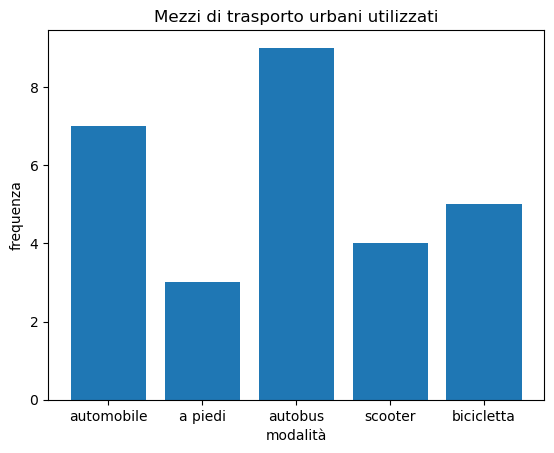

In [2]:
mod = ['automobile', 'a piedi', 'autobus', 'scooter', 'bicicletta']  # modalità
freq = np.array([7, 3, 9, 4, 5]) # frequenze

plt.figure()
plt.bar(mod, freq)
plt.title('Mezzi di trasporto urbani utilizzati')
plt.xlabel('modalità')
plt.ylabel('frequenza')
plt.show()

#### Esempio 2 
Indagine sul peso di 100 studenti

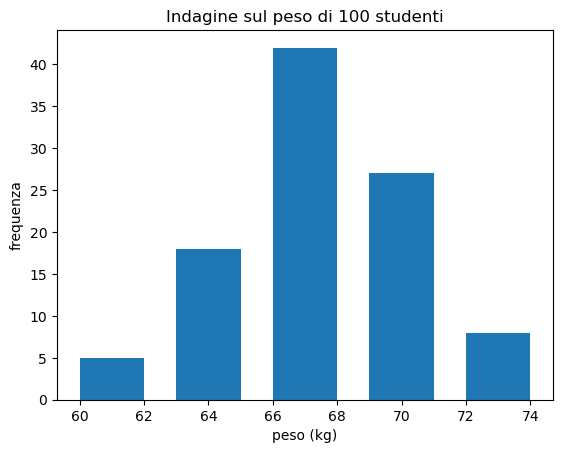

In [3]:
pesi = np.array([[60, 62], [63, 65], [66, 68], [69, 71], [72, 74]])
freq = np.array([5, 18, 42, 27, 8])

ampiezza = pesi[:, 1] - pesi[:, 0] # seconda colonna - prima colonna
pesi_medi = np.mean(pesi, 1) # oppure (pesi[:, 0] + pesi[:, 1])/2

plt.figure()
plt.bar(pesi_medi, freq, width=ampiezza)
plt.title('Indagine sul peso di 100 studenti')
plt.xlabel('peso (kg)')
plt.ylabel('frequenza')
plt.show()

#### Esempio 3
Un monitoraggio sulla densità di polveri sottili nell'aria ha condotto alle frequenze riportate sotto.
- Si calcolino i quartili empirici

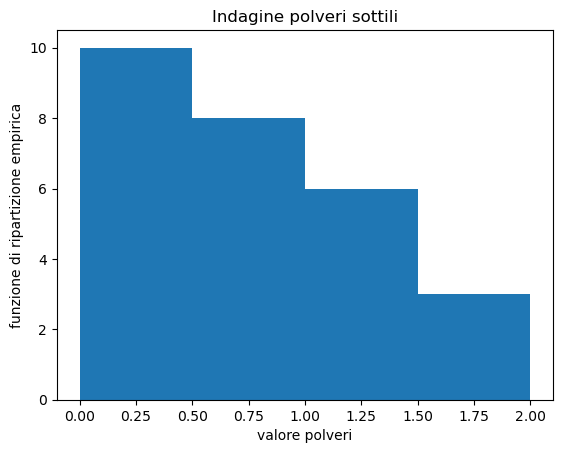

In [4]:
valori = np.array([[0,0.5], [0.5, 1], [1, 1.5], [1.5, 2]])
freq = np.array([10, 8, 6, 3])

ampiezza = valori[:,1] - valori[:,0]
val_medi = np.mean(valori, 1)

p_relative = freq/sum(freq) # probabilità relative dei valori
f_cumulate = np.cumsum(p_relative) # frequenze cumulate
f_cumulate = np.insert(f_cumulate, 0, 0)

plt.figure()
plt.bar(val_medi, freq, width=ampiezza)
plt.title('Indagine polveri sottili')
plt.xlabel('valore polveri')
plt.ylabel('funzione di ripartizione empirica')
plt.show() 

In [6]:
x = np.array([0, 0.5, 1, 1.5, 2])
alpha = np.array([0.25, 0.5, 0.75])

jj = np.zeros(3, dtype=int)
for k in range(3):
    for j in range(1,5):
        if alpha[k]>=f_cumulate[j-1] and alpha[k]<=f_cumulate[j]:
            jj[k] = j
jj

array([1, 2, 3])

In [7]:
q_alpha = np.zeros(3)
for k in range(3):
    j = jj[k]
    q_alpha[k] = x[j-1] + (alpha[k] - f_cumulate[j-1])*(x[j]-x[j-1])/(f_cumulate[j]-f_cumulate[j-1])
    
display(q_alpha)

array([0.3375 , 0.71875, 1.1875 ])

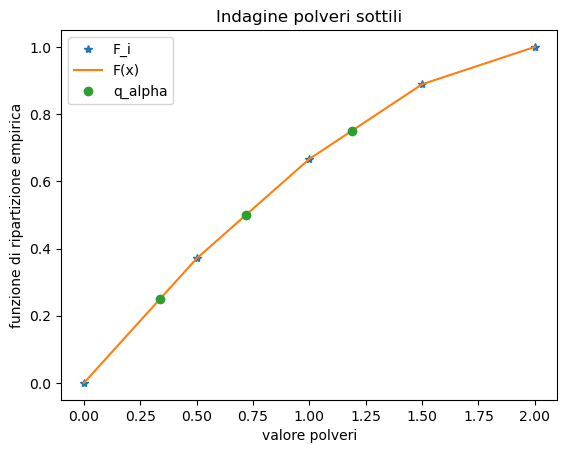

In [9]:
fig, ax = plt.subplots(1, 1)

x = np.array([0, 0.5, 1, 1.5, 2])
plt.plot(x, f_cumulate, '*', label='F_i')
plt.plot(x, f_cumulate, '-', label='F(x)')
plt.plot(q_alpha,alpha, 'o', label='q_alpha')

plt.legend(loc='upper left')

# set titolo
plt.title("Indagine polveri sottili")
  
# set assi
ax.set_xlabel('valore polveri')
ax.set_ylabel('funzione di ripartizione empirica')

plt.show()